In [2]:
#Imports
import io
import os
import re
import math
import textwrap
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Notebook settings
default_max_columns = None
default_max_rows = 512
pd.set_option('display.max_columns', default_max_columns)
pd.set_option('display.max_rows', default_max_rows)

cwd = os.getcwd()
model_names = ["SUPPORT_VECTOR_MACHINE","RANDOM_FOREST","NEURAL_NETWORK"]
num_models = len(model_names)

In [3]:
#Utility Functions
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [4]:
#Load Dataframes
df_list = []
for i in range(num_models):
    df_temp = pd.read_csv(cwd+"/results/"+model_names[i]+"_results.csv")
    df_list.append(df_temp)

#Combine Dataframes
results_df = pd.DataFrame()
for i in range(num_models):
    results_df = pd.concat([results_df,df_list[i]])
del df_list

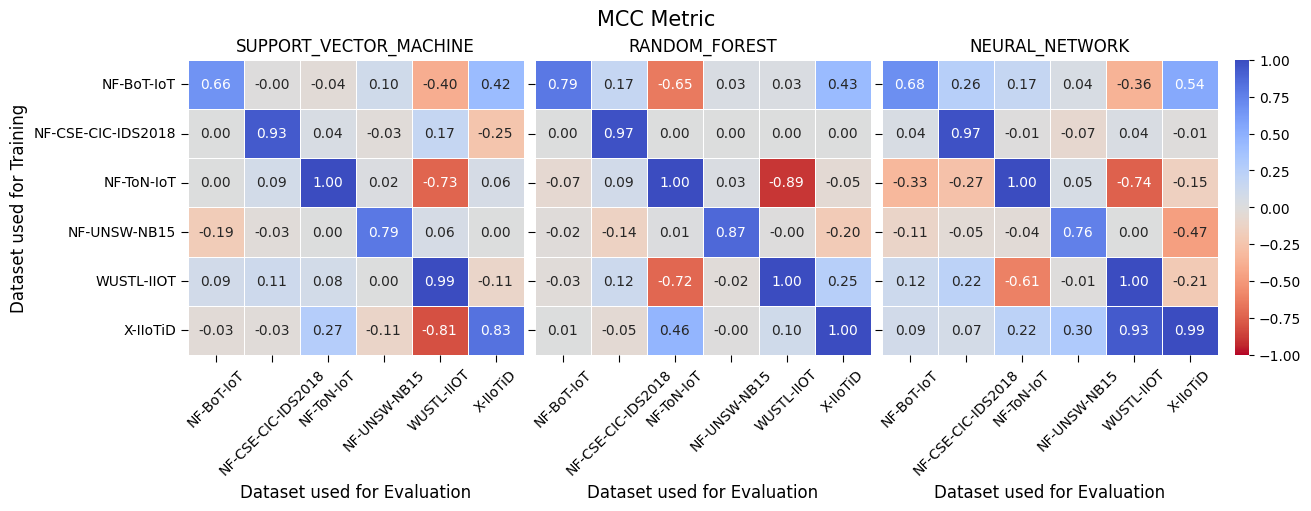

In [23]:
metric = "MCC"
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(13, 5),layout="constrained", sharex=True, sharey=True)
m_name = model_names[0]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name)][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "coolwarm_r", vmin = -1, vmax = 1, ax = axs[0], fmt=".2f" ,cbar = False)
p.axes.set_title(m_name)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel('Dataset used for Training', fontsize = 12)

m_name = model_names[1]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name)][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "coolwarm_r", vmin = -1, vmax = 1, ax = axs[1], fmt=".2f" ,cbar = False)
p.axes.set_title(m_name)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)

m_name = model_names[2]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name)][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "coolwarm_r", vmin = -1, vmax = 1, ax = axs[2], fmt=".2f" ,cbar = True)
p.axes.set_title(m_name)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)
fig.suptitle('MCC Metric', fontsize=15)

plt.savefig("mcc_metric.pdf", format='pdf')

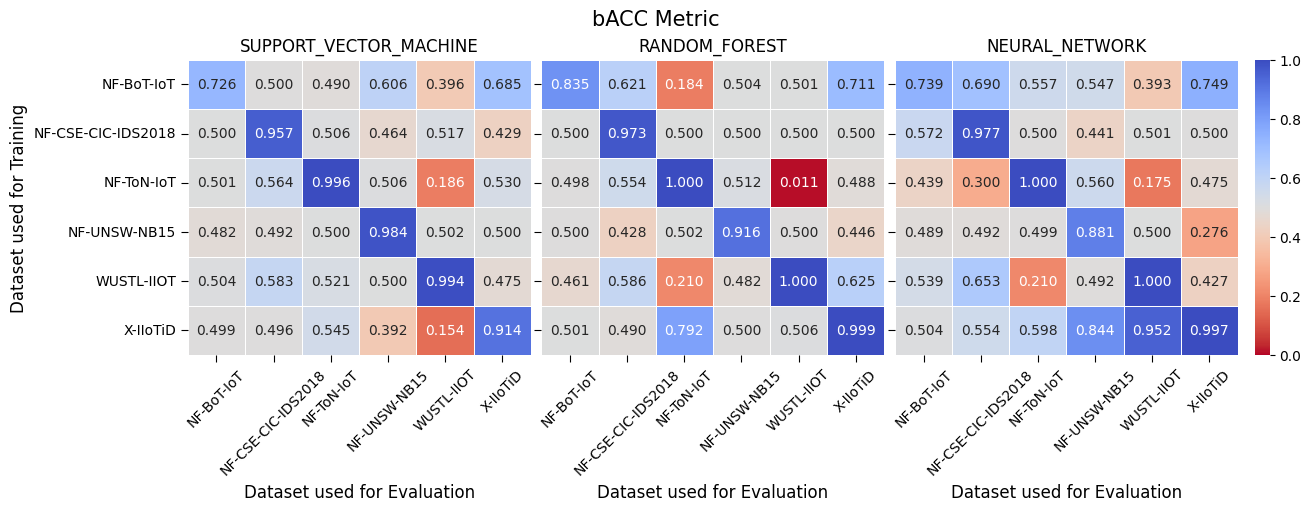

In [20]:
metric = "BALANCED_ACCURACY"
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(13, 5),layout="constrained", sharex=True, sharey=True)
m_name = model_names[0]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name)][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "coolwarm_r", vmin = 0, vmax = 1, ax = axs[0], fmt=".3f" ,cbar = False)
p.axes.set_title(m_name)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel('Dataset used for Training', fontsize = 12)

m_name = model_names[1]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name)][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "coolwarm_r", vmin = 0, vmax = 1, ax = axs[1], fmt=".3f",cbar = False)
p.axes.set_title(m_name)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)

m_name = model_names[2]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name)][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "coolwarm_r", vmin = 0, vmax = 1, ax = axs[2], fmt=".3f" ,cbar = True)
p.axes.set_title(m_name)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)
fig.suptitle('bACC Metric', fontsize=15)
plt.savefig("bacc_metric.pdf", format='pdf')

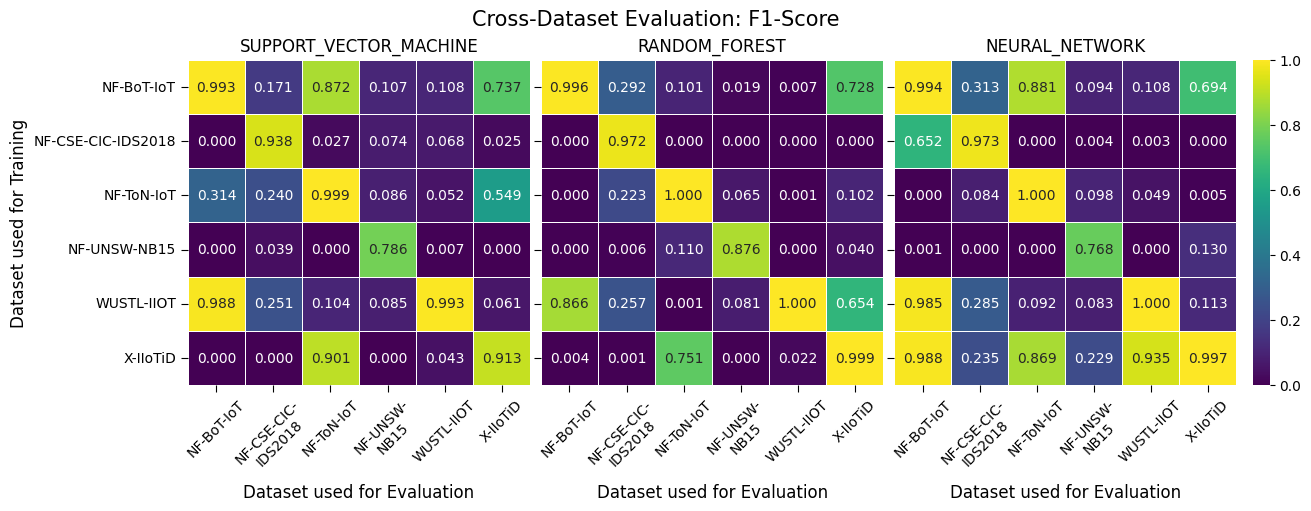

In [8]:
metric = "F1_SCORE"
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(13, 5),layout="constrained", sharex=True, sharey=True)
m_name = model_names[0]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name) & (results_df["LABEL"] == "1")][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "viridis", vmin = 0, vmax = 1, ax = axs[0],cbar = False, fmt=".3f")
p.axes.set_title(m_name)
wrap_labels(p, 11, True)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel('Dataset used for Training', fontsize = 12)

m_name = model_names[1]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name) & (results_df["LABEL"] == "1")][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "viridis", vmin = 0, vmax = 1, ax = axs[1],cbar = False, fmt=".3f")
p.axes.set_title(m_name)
wrap_labels(p, 11, True)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)

m_name = model_names[2]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name) & (results_df["LABEL"] == "1")][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "viridis", vmin = 0, vmax = 1, ax = axs[2],cbar = True, fmt=".3f")
p.axes.set_title(m_name)
wrap_labels(p, 11, True)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)
fig.suptitle('F1-Score', fontsize=15)
plt.savefig("f1_score.pdf", format='pdf')

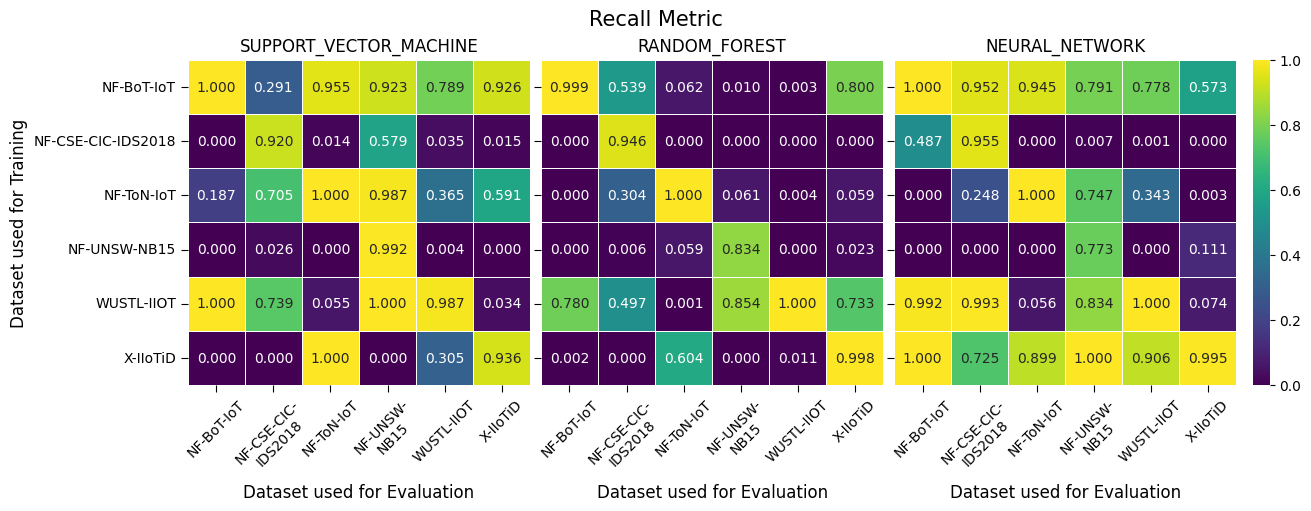

In [13]:
metric = "RECALL"
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(13, 5),layout="constrained", sharex=True, sharey=True)
m_name = model_names[0]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name) & (results_df["LABEL"] == "1")][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "viridis", vmin = 0, vmax = 1, ax = axs[0],cbar = False, fmt=".3f")
p.axes.set_title(m_name)
wrap_labels(p, 11, True)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel('Dataset used for Training', fontsize = 12)

m_name = model_names[1]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name) & (results_df["LABEL"] == "1")][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "viridis", vmin = 0, vmax = 1, ax = axs[1],cbar = False, fmt=".3f")
p.axes.set_title(m_name)
wrap_labels(p, 11, True)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)

m_name = model_names[2]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name) & (results_df["LABEL"] == "1")][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "viridis", vmin = 0, vmax = 1, ax = axs[2],cbar = True, fmt=".3f")
p.axes.set_title(m_name)
wrap_labels(p, 11, True)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)
fig.suptitle('Recall Metric', fontsize=15)
plt.savefig("recall_metric.pdf", format='pdf')

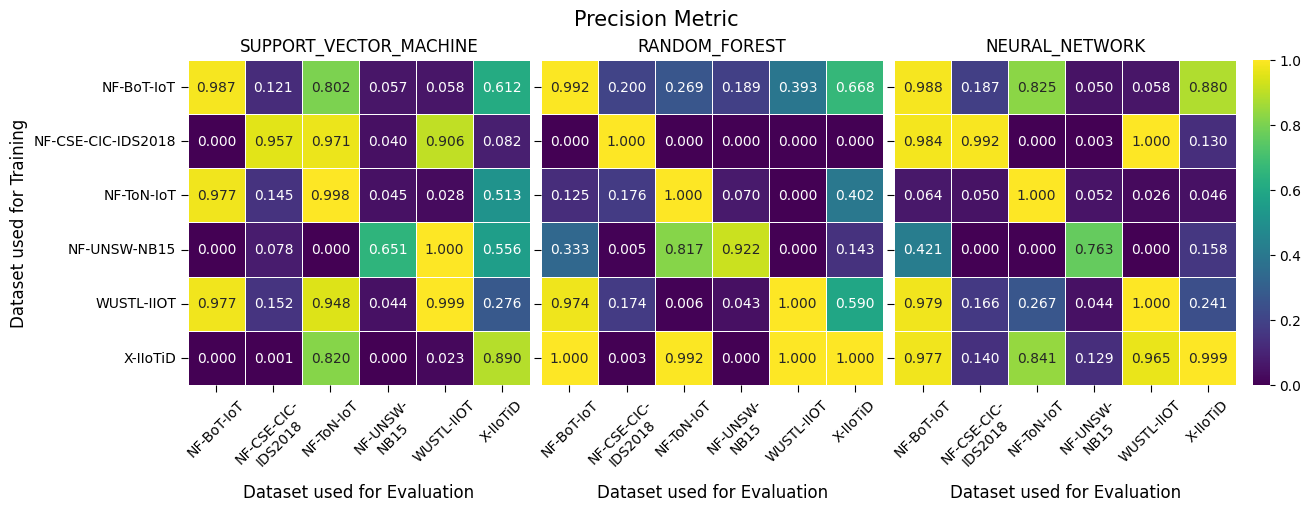

In [14]:
metric = "PRECISION"
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(13, 5),layout="constrained", sharex=True, sharey=True)
m_name = model_names[0]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name) & (results_df["LABEL"] == "1")][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "viridis", vmin = 0, vmax = 1, ax = axs[0],cbar = False, fmt=".3f")
p.axes.set_title(m_name)
wrap_labels(p, 11, True)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel('Dataset used for Training', fontsize = 12)

m_name = model_names[1]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name) & (results_df["LABEL"] == "1")][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "viridis", vmin = 0, vmax = 1, ax = axs[1],cbar = False, fmt=".3f")
p.axes.set_title(m_name)
wrap_labels(p, 11, True)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)

m_name = model_names[2]
plot_data = results_df.loc[(results_df["METRIC"] == metric) & (results_df["MODEL"] == m_name) & (results_df["LABEL"] == "1")][["TRAIN_DATASET","EVAL_DATASET","VAlUE"]]
plot_data = plot_data.pivot(index="TRAIN_DATASET", columns="EVAL_DATASET", values="VAlUE")
p = sns.heatmap(plot_data, annot=True, linewidths=0.5, cmap = "viridis", vmin = 0, vmax = 1, ax = axs[2],cbar = True, fmt=".3f")
p.axes.set_title(m_name)
wrap_labels(p, 11, True)
p.tick_params(axis='x', rotation=45,size = 5)
p.tick_params(axis='y',size = 5)
p.set_xlabel('Dataset used for Evaluation', fontsize = 12)
p.set_ylabel(None, fontsize = 12)
fig.suptitle('Precision Metric', fontsize=15)
plt.savefig("precision_metric.pdf", format='pdf')

In [31]:
results_df.loc[(results_df["TRAIN_DATASET"] == "NF-CSE-CIC-IDS2018") & (results_df["EVAL_DATASET"] == "NF-CSE-CIC-IDS2018") & (results_df["MODEL"] == model_names[0]) & ((results_df["LABEL"] == "1") | (results_df["LABEL"] == "BOTH"))]

,TRAIN_DATASET,EVAL_DATASET,METRIC,VAlUE,LABEL,MODEL
77,NF-CSE-CIC-IDS2018,NF-CSE-CIC-IDS2018,ACCURACY,0.985262,BOTH,SUPPORT_VECTOR_MACHINE
78,NF-CSE-CIC-IDS2018,NF-CSE-CIC-IDS2018,BALANCED_ACCURACY,0.957292,BOTH,SUPPORT_VECTOR_MACHINE
79,NF-CSE-CIC-IDS2018,NF-CSE-CIC-IDS2018,MCC,0.930037,BOTH,SUPPORT_VECTOR_MACHINE
81,NF-CSE-CIC-IDS2018,NF-CSE-CIC-IDS2018,PRECISION,0.956710,1,SUPPORT_VECTOR_MACHINE
83,NF-CSE-CIC-IDS2018,NF-CSE-CIC-IDS2018,RECALL,0.920345,1,SUPPORT_VECTOR_MACHINE
85,NF-CSE-CIC-IDS2018,NF-CSE-CIC-IDS2018,F1_SCORE,0.938175,1,SUPPORT_VECTOR_MACHINE
87,NF-CSE-CIC-IDS2018,NF-CSE-CIC-IDS2018,SUPPORT,203941.000000,1,SUPPORT_VECTOR_MACHINE


In [30]:
results_df.loc[(results_df["TRAIN_DATASET"] == "X-IIoTiD") & (results_df["EVAL_DATASET"] == "WUSTL-IIOT") & (results_df["MODEL"] == model_names[2]) & ((results_df["LABEL"] == "1") | (results_df["LABEL"] == "BOTH"))]

,TRAIN_DATASET,EVAL_DATASET,METRIC,VAlUE,LABEL,MODEL
319,X-IIoTiD,WUSTL-IIOT,ACCURACY,0.990817,BOTH,NEURAL_NETWORK
320,X-IIoTiD,WUSTL-IIOT,BALANCED_ACCURACY,0.951546,BOTH,NEURAL_NETWORK
321,X-IIoTiD,WUSTL-IIOT,MCC,0.930199,BOTH,NEURAL_NETWORK
323,X-IIoTiD,WUSTL-IIOT,PRECISION,0.965453,1,NEURAL_NETWORK
325,X-IIoTiD,WUSTL-IIOT,RECALL,0.905623,1,NEURAL_NETWORK
327,X-IIoTiD,WUSTL-IIOT,F1_SCORE,0.934582,1,NEURAL_NETWORK
329,X-IIoTiD,WUSTL-IIOT,SUPPORT,17250.000000,1,NEURAL_NETWORK


In [33]:
results_df.loc[(results_df["TRAIN_DATASET"] == "NF-ToN-IoT") & (results_df["EVAL_DATASET"] == "NF-UNSW-NB15") & (results_df["MODEL"] == model_names[1]) & ((results_df["LABEL"] == "1") | (results_df["LABEL"] == "BOTH"))]

,TRAIN_DATASET,EVAL_DATASET,METRIC,VAlUE,LABEL,MODEL
198,NF-ToN-IoT,NF-UNSW-NB15,ACCURACY,0.922575,BOTH,RANDOM_FOREST
199,NF-ToN-IoT,NF-UNSW-NB15,BALANCED_ACCURACY,0.511788,BOTH,RANDOM_FOREST
200,NF-ToN-IoT,NF-UNSW-NB15,MCC,0.025182,BOTH,RANDOM_FOREST
202,NF-ToN-IoT,NF-UNSW-NB15,PRECISION,0.070128,1,RANDOM_FOREST
204,NF-ToN-IoT,NF-UNSW-NB15,RECALL,0.061100,1,RANDOM_FOREST
206,NF-ToN-IoT,NF-UNSW-NB15,F1_SCORE,0.065303,1,RANDOM_FOREST
208,NF-ToN-IoT,NF-UNSW-NB15,SUPPORT,14370.000000,1,RANDOM_FOREST


In [34]:
results_df.loc[(results_df["TRAIN_DATASET"] == "NF-ToN-IoT") & (results_df["EVAL_DATASET"] == "WUSTL-IIOT") & (results_df["MODEL"] == model_names[1]) & ((results_df["LABEL"] == "1") | (results_df["LABEL"] == "BOTH"))]

,TRAIN_DATASET,EVAL_DATASET,METRIC,VAlUE,LABEL,MODEL
253,NF-ToN-IoT,WUSTL-IIOT,ACCURACY,0.017127,BOTH,RANDOM_FOREST
254,NF-ToN-IoT,WUSTL-IIOT,BALANCED_ACCURACY,0.010989,BOTH,RANDOM_FOREST
255,NF-ToN-IoT,WUSTL-IIOT,MCC,-0.890770,BOTH,RANDOM_FOREST
257,NF-ToN-IoT,WUSTL-IIOT,PRECISION,0.000304,1,RANDOM_FOREST
259,NF-ToN-IoT,WUSTL-IIOT,RECALL,0.003803,1,RANDOM_FOREST
261,NF-ToN-IoT,WUSTL-IIOT,F1_SCORE,0.000564,1,RANDOM_FOREST
263,NF-ToN-IoT,WUSTL-IIOT,SUPPORT,17354.000000,1,RANDOM_FOREST
